In [1]:
import numpy as np

In [2]:

def y2_dash(y):
    return -25

def y1_dash(y2):
    return y2-200



In [3]:
def runge_kutta_4(y0, x0, h, n, f, extra=None):
    y = y0
    arr = [y]
    x = x0
    for i in range(n):
        if extra is not None:
            arg = extra[i]   # passing external values (like y2 into y1 equation)
        else:
            arg = y
        
        k1 = h * f(arg)
        k2 = h * f(arg + 0.5*k1)
        k3 = h * f(arg + 0.5*k2)
        k4 = h * f(arg + k3)
        
        y = y + (k1 + 2*k2 + 2*k3 + k4)/6
        arr.append(y)
        x += h
    return arr


In [4]:
def shooting_method(y1_dash, y2_dash):
    y1_0 = 40
    y1_L = 200
    x_0, x_L = 0, 10
    h = 1
    n = int((x_L-x_0)/h)

    def solve(y2_0):
        # integrate y2
        y2_vals = runge_kutta_4(y2_0, x_0, h, n, y2_dash)
        # integrate y1 using computed y2
        y1_vals = runge_kutta_4(y1_0, x_0, h, n, y1_dash, y2_vals)
        return y1_vals[-1], y1_vals

    # two guesses for slope
    s0, _ = solve(0.0)
    print(_)
    s1, _ = solve(5.0)
    print(_)



    for _ in range(10):
        # secant update
        y2_new = 5.0 - (s1 - y1_L) * (5.0 - 0.0) / ((s1 - y1_L) - (s0 - y1_L))
        s2, y1_vals = solve(y2_new)

        if abs(s2 - y1_L) < 1e-3:
            return y1_vals

        s0, s1 = s1, s2

    return y1_vals

y1_vals = shooting_method(y1_dash, y2_dash)
print(y1_vals)


[40, -301.6666666666667, -686.0416666666667, -1113.125, -1582.9166666666667, -2095.416666666667, -2650.6250000000005, -3248.541666666667, -3889.166666666667, -4572.5, -5298.541666666667]
[40, -293.125, -668.9583333333333, -1087.5, -1548.75, -2052.7083333333335, -2599.375, -3188.75, -3820.8333333333335, -4495.625, -5213.125]
[40, 248.1874999999981, 413.6666666666629, 536.4374999999943, 616.4999999999924, 653.8541666666571, 648.4999999999885, 600.4374999999866, 509.66666666665134, 376.1874999999827, 199.99999999998082]


[40, -301.6666666666667, -686.0416666666667, -1113.125, -1582.9166666666667, -2095.416666666667, -2650.6250000000005, -3248.541666666667, -3889.166666666667, -4572.5, -5298.541666666667]
[40, -293.125, -668.9583333333333, -1087.5, -1548.75, -2052.7083333333335, -2599.375, -3188.75, -3820.8333333333335, -4495.625, -5213.125]


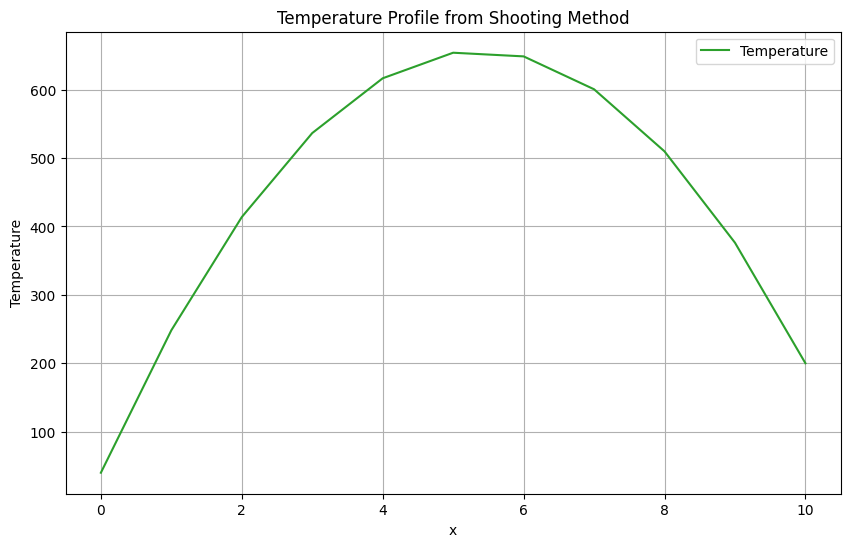

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Solve with shooting method
y1_vals = shooting_method(y1_dash, y2_dash)

x_0, x_L = 0, 10
h = 1
n = int((x_L-x_0)/h)

t = np.linspace(x_0, x_L, n+1)  # x values
colors = "tab:green"

plt.figure(figsize=(10, 6))
plt.plot(t, y1_vals, '-', color=colors, alpha=1, label="Temperature")
plt.xlabel("x")
plt.ylabel("Temperature")
plt.title("Temperature Profile from Shooting Method")
plt.legend()
plt.grid(True)
plt.show()


In [87]:
def finite_difference_method(L=10, h=1, f_val=25):
    n = int(L/h)   # number of intervals
    x = np.linspace(0, L, n+1)

    # number of interior points
    N = n-1

    # Coefficient matrix (tridiagonal)
    A = np.zeros((N, N))
    b = np.zeros(N)

    for i in range(N):
        A[i, i] = -2
        if i > 0:
            A[i, i-1] = 1
        if i < N-1:
            A[i, i+1] = 1
        b[i] = -(h**2) * f_val  # RHS from Poisson eqn

    # Apply boundary conditions: T(0)=40, T(L)=200
    b[0] -= 40
    b[-1] -= 200

    # Solve system
    T_internal = np.linalg.solve(A, b)

    # Full solution including boundaries
    T = np.concatenate(([40], T_internal, [200]))
    return x, T

# Run finite difference
x_fd, T_fd = finite_difference_method()
print(x_fd)
print(T_fd)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 40.  168.5 272.  350.5 404.  432.5 436.  414.5 368.  296.5 200. ]


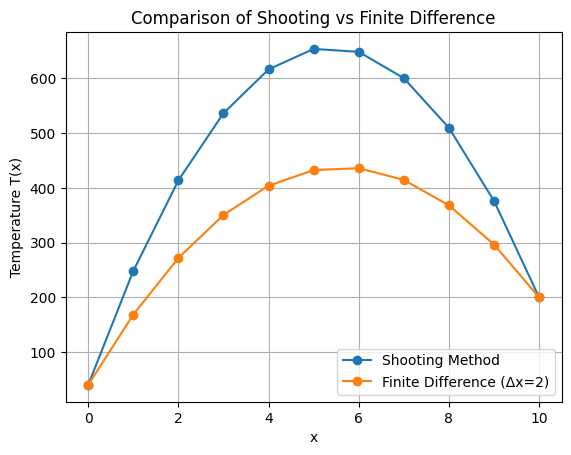

In [88]:
t = np.linspace(x_0, x_L, n+1)  # x values

plt.plot(x_fd, y1_vals,'o-', label="Shooting Method")   # no [:,0] needed
plt.plot(x_fd, T_fd, 'o-', label="Finite Difference (Δx=2)")
plt.xlabel("x")
plt.ylabel("Temperature T(x)")
plt.title("Comparison of Shooting vs Finite Difference")
plt.legend()
plt.grid(True)
plt.show()


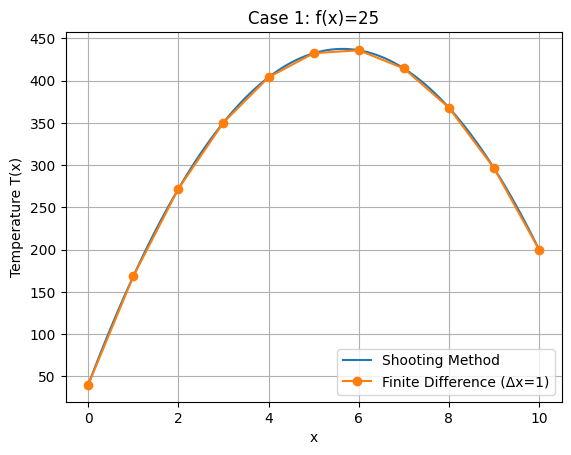

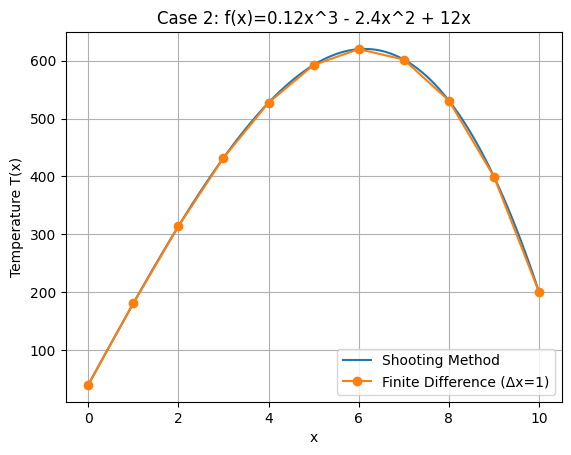

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# ========= General f(x) =========
def f_source(x, case=1):
    if case == 1:  # Part 1: constant
        return 25.0
    elif case == 2:  # Part 2: polynomial
        return 0.12*x*3 - 2.4*x*2 + 12*x

# ========= System of ODEs for Shooting =========
def f(X, x, case=1):
    y1, y2 = X
    dy1dx = y2
    dy2dx = -f_source(x, case)
    return np.array([dy1dx, dy2dx])

# ========= RK4 Solver =========
def RK4_method(f, X0, t_start, t_end, h, case=1):
    n = int((t_end - t_start) / h)
    X = np.zeros((n+1, len(X0)))
    x_vals = np.linspace(t_start, t_end, n+1)
    X[0] = X0
    for i in range(n):
        k1 = f(X[i], x_vals[i], case)
        k2 = f(X[i] + 0.5*h*k1, x_vals[i] + 0.5*h, case)
        k3 = f(X[i] + 0.5*h*k2, x_vals[i] + 0.5*h, case)
        k4 = f(X[i] + h*k3, x_vals[i] + h, case)
        X[i+1] = X[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return x_vals, X

# ========= Shooting Method =========
def shoot(s_guess, h=0.1, case=1):
    X0 = np.array([40, s_guess])  # T(0)=40
    x_vals, sol = RK4_method(f, X0, 0, 10, h, case)
    return x_vals, sol

def F(s_guess, h=0.1, case=1):
    _, sol = shoot(s_guess, h, case)
    return sol[-1,0] - 200   # want T(10)=200

def secant(s0, s1, tol=1e-5, max_iter=50, case=1):
    for _ in range(max_iter):
        f0, f1 = F(s0, case=case), F(s1, case=case)
        if abs(f1 - f0) < 1e-12: break
        s_new = s1 - f1 * (s1 - s0) / (f1 - f0)
        if abs(F(s_new, case=case)) < tol: return s_new
        s0, s1 = s1, s_new
    return s1

def shooting_method(case=1, h=0.1):
    s_opt = secant(0, 20, case=case)   # initial guesses
    x_vals, sol = shoot(s_opt, h, case)
    return x_vals, sol[:,0]

# ========= Finite Difference =========
def finite_difference_method(L=10, h=1, case=1):
    n = int(L/h)
    x = np.linspace(0, L, n+1)
    N = n-1   # interior points

    A = np.zeros((N,N))
    b = np.zeros(N)

    for i in range(N):
        xi = x[i+1]   # interior point
        A[i,i] = -2
        if i>0: A[i,i-1] = 1
        if i<N-1: A[i,i+1] = 1
        b[i] = -(h**2)*f_source(xi, case)

    # boundary conditions
    b[0] -= 40
    b[-1] -= 200

    T_internal = np.linalg.solve(A, b)
    T = np.concatenate(([40], T_internal, [200]))
    return x, T

# ========= Compare Both =========
for case in [1,2]:
    if case==1:
        title="Case 1: f(x)=25"
    else:
        title="Case 2: f(x)=0.12x^3 - 2.4x^2 + 12x"

    # Shooting
    x_s, T_s = shooting_method(case=case)
    # Finite Difference
    x_fd, T_fd = finite_difference_method(case=case)

    # Plot
    plt.plot(x_s, T_s, label="Shooting Method")
    plt.plot(x_fd, T_fd, 'o-', label="Finite Difference (Δx=1)")
    plt.xlabel("x")
    plt.ylabel("Temperature T(x)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

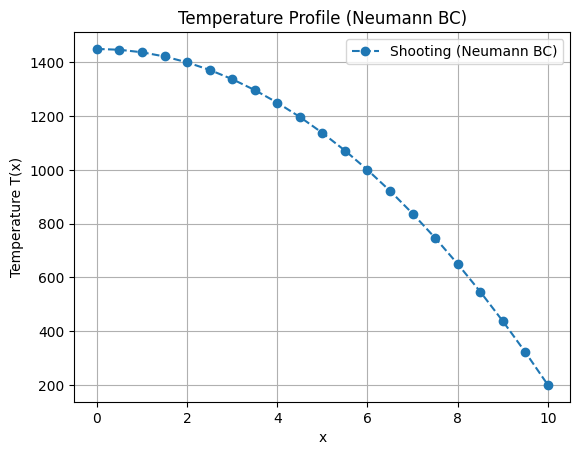

In [103]:
import numpy as np
import matplotlib.pyplot as plt

#RK4 Solver
def RK4_method(f, X0, t_start, t_end, h):
    n = int((t_end - t_start) / h)
    X = np.zeros((n+1, len(X0)))
    x_vals = np.linspace(t_start, t_end, n+1)
    X[0] = X0
    for i in range(n):
        k1 = f(X[i], x_vals[i])
        k2 = f(X[i] + 0.5*h*k1, x_vals[i] + 0.5*h)
        k3 = f(X[i] + 0.5*h*k2, x_vals[i] + 0.5*h)
        k4 = f(X[i] + h*k3, x_vals[i] + h)
        X[i+1] = X[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return x_vals, X

# System of ODEs
def f_system(X, x, f_const=25):
    # X = [T, T']
    T, dT = X
    dTdx = dT
    d2Tdx2 = -f_const   # Example ODE: T'' = -f_const
    return np.array([dTdx, d2Tdx2])

# Shooting method with Neumann BC
def shoot_neumann(s_guess, f_func, h=0.5):
    X0 = np.array([s_guess, 0.0])   # T(0) = s_guess, T'(0) = 0
    x_vals, sol = RK4_method(f_func, X0, 0, 10, h)
    return x_vals, sol

def F_neumann(s_guess, f_func, h=0.5):
    _, sol = shoot_neumann(s_guess, f_func, h)
    return sol[-1,0] - 200   # Boundary condition: T(10) = 200

def secant_neumann(s0, s1, f_func, tol=1e-5, max_iter=50):
    for _ in range(max_iter):
        f0, f1 = F_neumann(s0, f_func), F_neumann(s1, f_func)
        if abs(f1 - f0) < 1e-12: break
        s_new = s1 - f1 * (s1 - s0) / (f1 - f0)
        if abs(F_neumann(s_new, f_func)) < tol:
            return s_new
        s0, s1 = s1, s_new
    return s1

s_opt_neu = secant_neumann(0, 100, f_system)   # find optimal T(0)
x_s_neu, sol_s_neu = shoot_neumann(s_opt_neu, f_system)
T_s_neu = sol_s_neu[:,0]

plt.plot(x_s_neu, T_s_neu, 'o--', label="Shooting (Neumann BC)")

plt.xlabel("x")
plt.ylabel("Temperature T(x)")
plt.title("Temperature Profile (Neumann BC)")
plt.legend()
plt.grid(True)
plt.show()


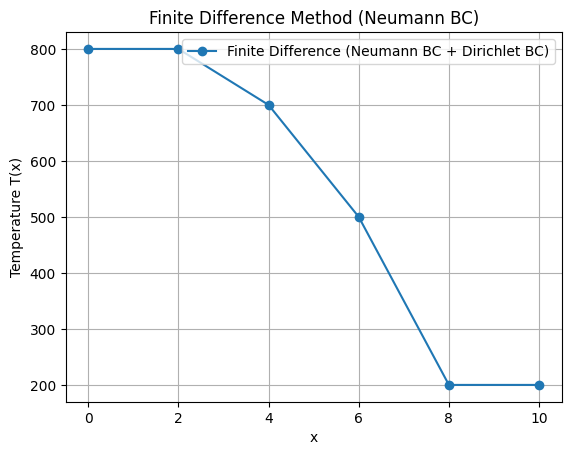

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def finite_difference_neumann(f_func, L=10, h=2, T_L=200):
    n = int(L/h)
    x = np.linspace(0, L, n+1)  # grid points
    N = n   # system size: T0..T_{n-1}

    A = np.zeros((N, N))
    b = np.zeros(N)

    # Neumann BC at x=0: T1 - T0 = 0  ->  T0 = T1
    A[0,0] = 1
    A[0,1] = -1
    b[0] = 0

    # Interior equations
    for i in range(1, N-1):
        xi = x[i]
        A[i,i-1] = 1
        A[i,i]   = -2
        A[i,i+1] = 1
        b[i] = -(h**2)*f_func(xi)

    # Dirichlet BC at x=L: T_n = T_L
    A[-1,-1] = 1
    b[-1] = T_L

    # Solve system
    T = np.linalg.solve(A, b)

    # Append boundary T(L)
    T = np.append(T, T_L)

    return x, T



f_const = lambda x: 25
x_fd, T_fd = finite_difference_neumann(f_const, L=10, h=2, T_L=200)

plt.plot(x_fd, T_fd, "o-", label="Finite Difference (Neumann BC + Dirichlet BC)")
plt.xlabel("x")
plt.ylabel("Temperature T(x)")
plt.title("Finite Difference Method (Neumann BC)")
plt.legend()
plt.grid(True)
plt.show()
